In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')

In [76]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
df.shape

(1460, 81)

In [27]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [37]:
df.describe()['SalePrice']

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [28]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [34]:
corr_matrix = df.corr(numeric_only=True)
high_corr = corr_matrix['SalePrice'][(corr_matrix['SalePrice'] > 0.7) | (corr_matrix['SalePrice'] < -0.7)]
high_corr

OverallQual    0.790982
GrLivArea      0.708624
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [10]:
df['OverallQual'].corr(df['SalePrice'])

np.float64(0.7909816005838052)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

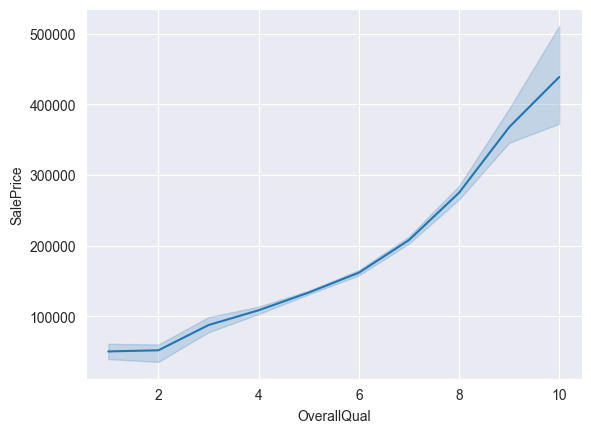

In [20]:
sns.lineplot(x=df['OverallQual'], y=df['SalePrice'])

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

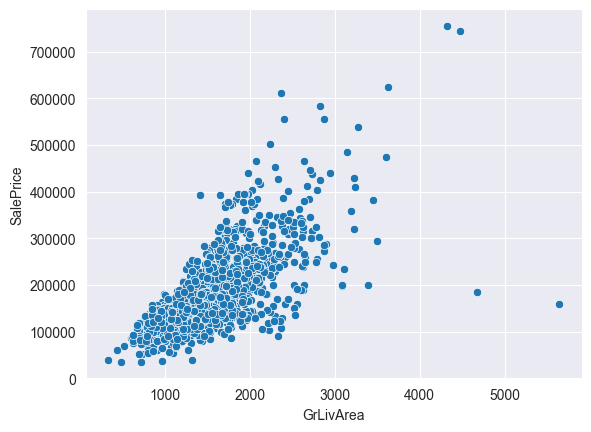

In [36]:
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

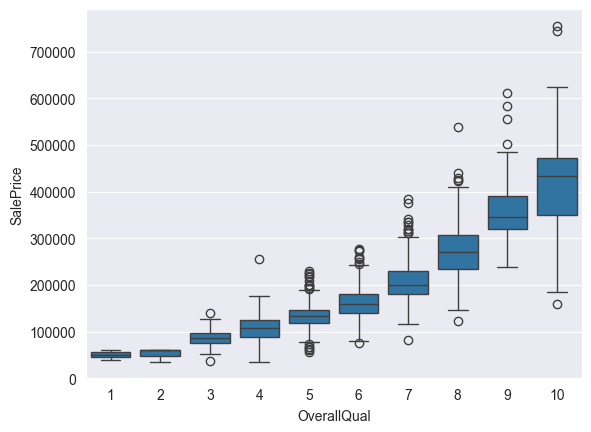

In [87]:
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

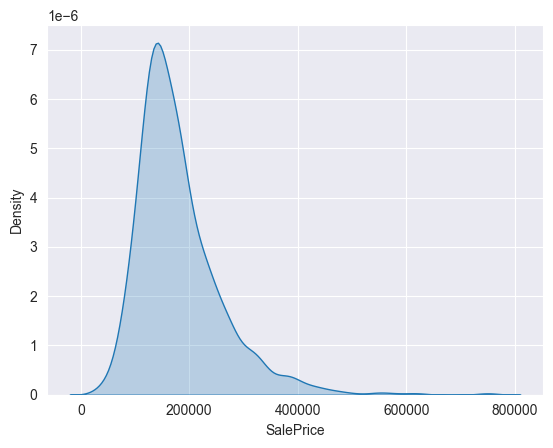

In [49]:
sns.kdeplot(x='SalePrice',data=df, fill=True)

In [57]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,New,Partial,372402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000
1353,1354,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,410000
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
1388,1389,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,377500


In [59]:
outliers.count()

Id               61
MSSubClass       61
MSZoning         61
LotFrontage      58
LotArea          61
                 ..
MoSold           61
YrSold           61
SaleType         61
SaleCondition    61
SalePrice        61
Length: 81, dtype: int64

In [66]:
df.groupby('CentralAir')['SalePrice'].mean()


CentralAir
N    105264.073684
Y    186186.709890
Name: SalePrice, dtype: float64

In [67]:
df.groupby('CentralAir')['SalePrice'].count()

CentralAir
N      95
Y    1365
Name: SalePrice, dtype: int64

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

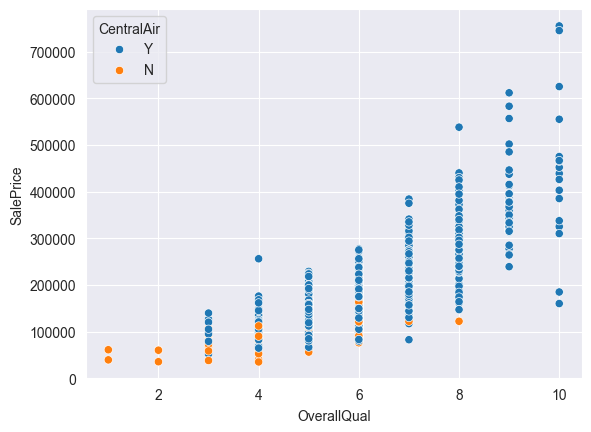

In [74]:
sns.scatterplot(x=df['OverallQual'], y=df['SalePrice'], hue=df['CentralAir'])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

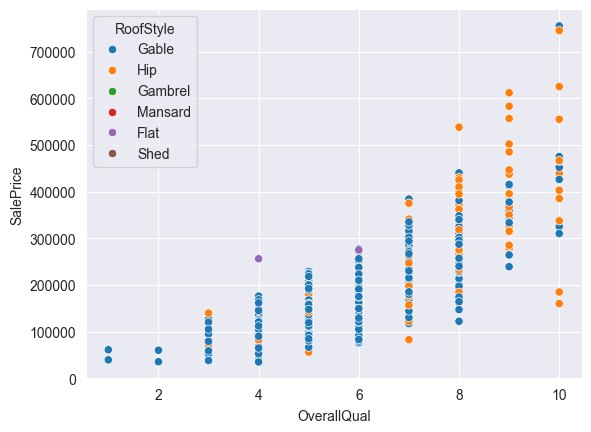

In [75]:
sns.scatterplot(x=df['OverallQual'], y=df['SalePrice'], hue=df['RoofStyle'])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

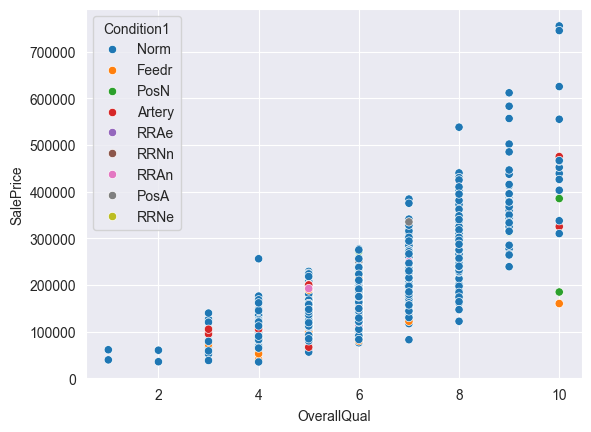

In [82]:
sns.scatterplot(x=df['OverallQual'], y=df['SalePrice'], hue=df['Condition1'])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

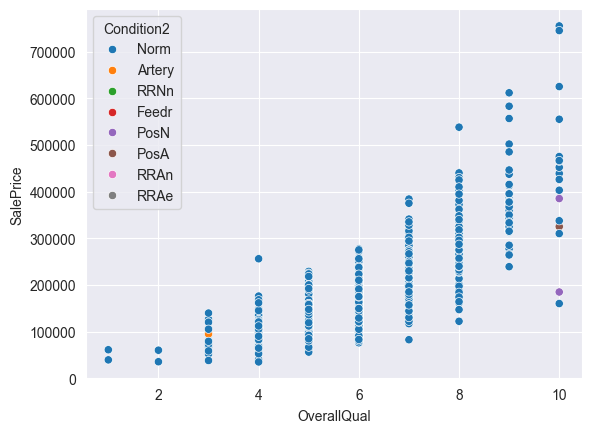

In [83]:
sns.scatterplot(x=df['OverallQual'], y=df['SalePrice'], hue=df['Condition2'])

In [72]:
df['SalePrice'].corr(df['YearBuilt'])

np.float64(0.5228973328794968)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

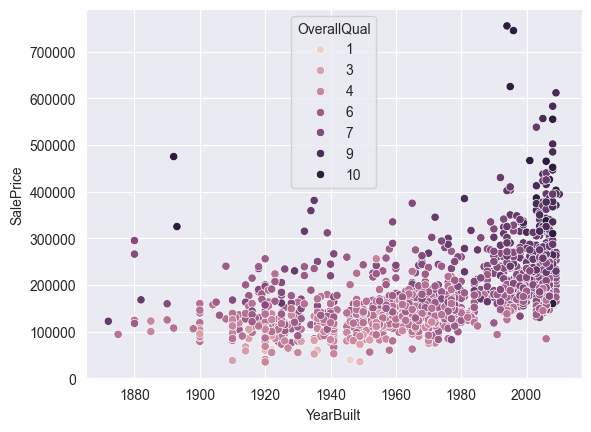

In [85]:
sns.scatterplot(x=df['YearBuilt'],y=df['SalePrice'],hue=df['OverallQual'])